In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
dataset = pd.read_csv('train.csv')

In [34]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [35]:
dataset.shape

(891, 12)

In [36]:
import seaborn as sns

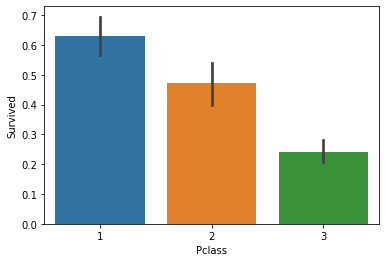

In [37]:
sns.barplot(x='Pclass', y='Survived', data=dataset)

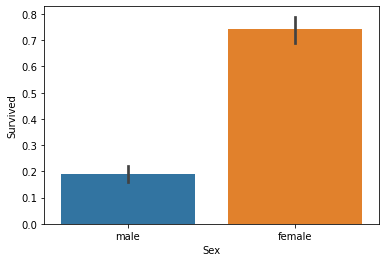

In [38]:
sns.barplot(x='Sex', y='Survived', data=dataset)

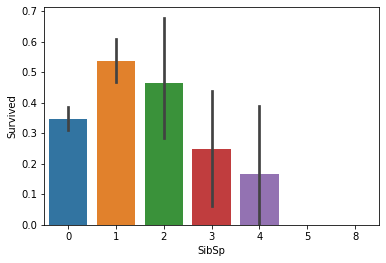

In [39]:
sns.barplot(x='SibSp', y='Survived', data=dataset)

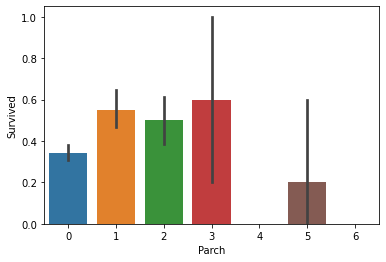

In [40]:
sns.barplot(x='Parch', y='Survived', data=dataset)

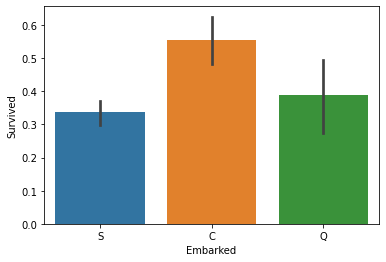

In [41]:
sns.barplot(x='Embarked', y='Survived', data=dataset)

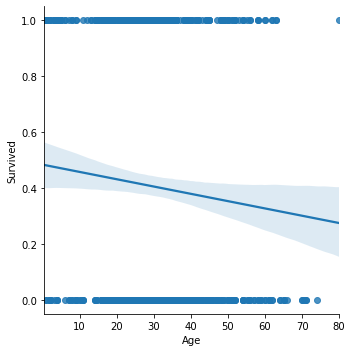

In [42]:
sns.lmplot(x='Age', y='Survived', data=dataset)

In [43]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
mean_age = dataset['Age'].median()

In [45]:
mean_age = int(mean_age)

In [46]:
mean_age

28

In [47]:
dataset['Age'] = dataset['Age'].fillna(dataset.groupby(['Sex'])['Age'].transform('mean'))
#fillna(df.groupby(['A','B','C'])['D'].transform('mean'))

In [48]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [49]:
mode_embarked = dataset['Embarked'].mode()

In [50]:
dataset['Embarked'] = dataset['Embarked'].fillna(mode_embarked[0])

In [51]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [52]:
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.726645,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [53]:
dataset = dataset.drop(['PassengerId', 'Name','Ticket','Cabin'], axis = 1)

In [54]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [55]:
dataset['Sex'] = dataset['Sex'].map({'male' : 0, 'female' : 1})

In [56]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [59]:
dataset['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [60]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [65]:
pclass_dummies = pd.get_dummies(dataset['Pclass'], prefix='Pclass').iloc[:, 1:]

In [66]:
pclass_dummies.head()

,Pclass_2,Pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [68]:
dataset = pd.concat([dataset, pclass_dummies], axis=1)

In [70]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3
0,0,3,0,22.0,1,0,7.2500,S,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,0
4,0,3,0,35.0,0,0,8.0500,S,0,1


In [72]:
dataset = dataset.drop(['Pclass'], axis=1)

In [73]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_2,Pclass_3
0,0,0,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,0,0
2,1,1,26.0,0,0,7.9250,S,0,1
3,1,1,35.0,1,0,53.1000,S,0,0
4,0,0,35.0,0,0,8.0500,S,0,1


In [74]:
dataset['Embarked'] = dataset['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [76]:
embarked_dummies = pd.get_dummies(dataset['Embarked'], prefix='Embarked').iloc[:, :-1]

In [77]:
dataset = pd.concat([dataset, embarked_dummies], axis=1)

In [80]:
dataset = dataset.drop(['Embarked'],axis=1)

In [81]:
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_0,Embarked_1
0,0,0,22.0,1,0,7.2500,0,1,1,0
1,1,1,38.0,1,0,71.2833,0,0,0,1
2,1,1,26.0,0,0,7.9250,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,0
4,0,0,35.0,0,0,8.0500,0,1,1,0


In [83]:
X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9]].values

In [84]:
y = dataset.iloc[:, 0].values

In [85]:
X

array([[ 0.        , 22.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.        , 38.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , 26.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 1.        , 27.91570881,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.        , 26.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.        , 32.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [86]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [210]:
# Embarked( ____ , S ,),  Pclass( __, __) , (Sex), (Age), (SibSp), (Parch) (Fare)

In [87]:
len(X)

891

In [88]:
len(y)

891

In [89]:
X.shape

(891, 9)

In [90]:
y.shape

(891,)

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [93]:
X[0]

array([-0.73769513, -0.59473226,  0.43279337, -0.47367361, -0.50244517,
       -0.51015154,  0.90258736,  0.61583843, -0.48204268])

In [94]:
from sklearn import linear_model

In [95]:
model = linear_model.LogisticRegression()

In [96]:
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [97]:
model.coef_

array([[ 1.27421066, -0.50170481, -0.35278148, -0.07679548,  0.12287729,
        -0.35931934, -1.04472681, -0.17079143,  0.02316914]])

In [98]:
y_pred = model.predict(X)

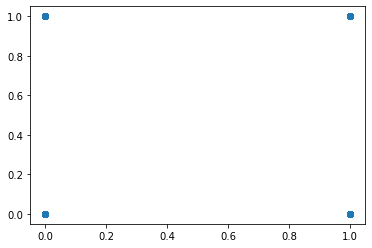

In [99]:
plt.scatter(y, y_pred)

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
confusion_matrix(y, y_pred)

array([[477,  72],
       [102, 240]], dtype=int64)

In [102]:
acc = (477 + 240)/891

In [103]:
acc

0.8047138047138047

In [254]:
testData = pd.read_csv('test.csv')

In [255]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [256]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [257]:
testData['Age'].mean()

30.272590361445783

In [258]:
testData['Age'] = testData['Age'].fillna(mean_age)

In [259]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [260]:
testData['Fare'] = testData['Fare'].fillna(testData['Fare'].mean())

In [261]:
testData.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [262]:
testData.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [265]:
X_test = testData.iloc[:, [1,3,4,5,6,8,10]].values

In [266]:
X_test

array([[3, 'male', 34.5, ..., 0, 7.8292, 'Q'],
       [3, 'female', 47.0, ..., 0, 7.0, 'S'],
       [2, 'male', 62.0, ..., 0, 9.6875, 'Q'],
       ...,
       [3, 'male', 38.5, ..., 0, 7.25, 'S'],
       [3, 'male', 29.0, ..., 0, 8.05, 'S'],
       [3, 'male', 29.0, ..., 1, 22.3583, 'C']], dtype=object)

In [267]:
#PClass
X_test = ct_pclass.transform(X_test)
X_test = X_test[: , 1:]

In [268]:
X_test[0]

array([0.0, 1.0, 'male', 34.5, 0, 0, 7.8292, 'Q'], dtype=object)

In [270]:
# now for 'sex'
X_test[:, 2] = label_encoder_sex.transform(X_test[:, 2])

In [271]:
X_test[0]

array([0.0, 1.0, 1, 34.5, 0, 0, 7.8292, 'Q'], dtype=object)

In [272]:
# for embarked
X_test = ct_em.transform(X_test)
X_test = X_test[: , 1:]

In [274]:
X_test[0]

array([1.0, 0.0, 0.0, 1.0, 1, 34.5, 0, 0, 7.8292], dtype=object)

In [275]:
X_test = sc.transform(X_test)

In [276]:
X_test[0]

array([ 3.25137334, -1.62380254, -0.51015154,  0.90258736,  0.73769513,
        0.38004881, -0.4745452 , -0.47367361, -0.49078316])

In [277]:
y_pred_test = model.predict(X_test)

In [279]:
len(y_pred_test)

418

In [281]:
np.savetxt("output.csv", y_pred_test, delimiter=",")

In [282]:
ans = pd.read_csv('my_submission.csv')

In [283]:
ans.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# NOW USING DECISION TREES

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
dataset = pd.read_csv('train.csv')

In [124]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
dataset['Embarked'].uniqueue()

AttributeError: 'Series' object has no attribute 'uniqueue'

In [126]:
X = dataset.iloc[:, [2, 4, 5, 6, 7, 9, 11]]
y = dataset.iloc[:, 1]

In [127]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [128]:
X['Age'] = X['Age'].fillna(X['Age'].mean())

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
X['Age'].mean()

29.69911764705882

In [130]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [131]:
X['Embarked'].mode()

0    S
dtype: object

In [132]:
X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
X['Embarked'] = X['Embarked'].map({'S' : 1, 'C' : 2, 'Q' : 3})

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
label_encoder_sex = LabelEncoder()
X['Sex'] = label_encoder_sex.fit_transform(X['Sex'])

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [137]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1


In [138]:
X = X.values

In [139]:
X

array([[ 3.        ,  1.        , 22.        , ...,  0.        ,
         7.25      ,  1.        ],
       [ 1.        ,  0.        , 38.        , ...,  0.        ,
        71.2833    ,  2.        ],
       [ 3.        ,  0.        , 26.        , ...,  0.        ,
         7.925     ,  1.        ],
       ...,
       [ 3.        ,  0.        , 29.69911765, ...,  2.        ,
        23.45      ,  1.        ],
       [ 1.        ,  1.        , 26.        , ...,  0.        ,
        30.        ,  2.        ],
       [ 3.        ,  1.        , 32.        , ...,  0.        ,
         7.75      ,  3.        ]])

In [140]:
y = y.values

In [141]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [142]:
from sklearn import tree

In [143]:
dtClassifier = tree.DecisionTreeClassifier()

In [144]:
dtClassifier.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [145]:
y_pred = dtClassifier.predict(X)

In [146]:
from sklearn.metrics import confusion_matrix

In [147]:
confusion_matrix(y, y_pred)

array([[547,   2],
       [ 14, 328]], dtype=int64)

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
clf=RandomForestClassifier(n_estimators=100)

In [151]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [152]:
y_pred = clf.predict(X)

In [153]:
confusion_matrix(y, y_pred)

array([[543,   6],
       [ 10, 332]], dtype=int64)

In [154]:
test_dataset = pd.read_csv('test.csv')

In [155]:
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
X = test_dataset.iloc[:, [1, 3,4,5,6,8,10]]

In [157]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [158]:
X.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [159]:
X['Age'] = X['Age'].fillna(29)

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
X['Embarked'] = X['Embarked'].fillna('S')

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [161]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [162]:
X['Fare'] = X['Fare'].fillna(X['Fare'].mean())

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [164]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [165]:
X['Sex'] = label_encoder_sex.transform(X['Sex'])

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
X['Embarked'] = X['Embarked'].map({'S' : 1, 'C' : 2, 'Q' : 3})

c:\users\ravi\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [169]:
y_test = clf.predict(X)

In [170]:
y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [171]:
len(y_test)

418

In [172]:
np.savetxt("output_rf.csv", y_test, delimiter=",")

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
clf.fit(X)